# Statistika Inferensial

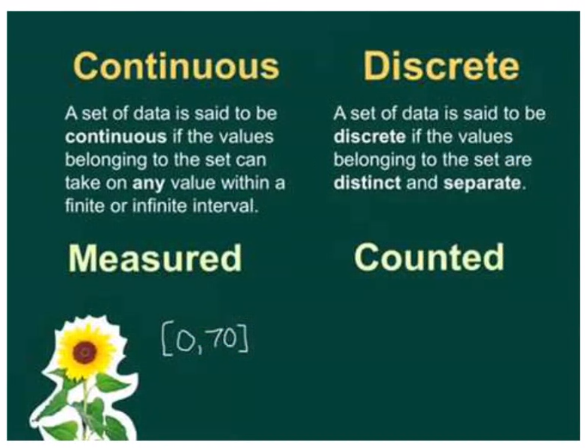

In [1]:
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image

In [2]:
import seaborn as sns #visualisasi data
sns.set(color_codes=True)

## Uniform Distribution

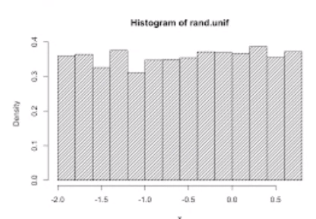

puncaknya relatif sama untuk diamati

In [3]:
from scipy.stats import uniform

In [4]:
data_uniform = uniform.rvs(size=10000, loc=10, scale=10)

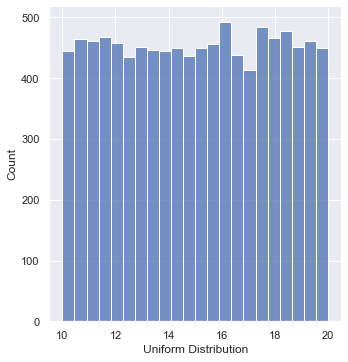

In [5]:
sns.displot(data_uniform)
plt.xlabel('Uniform Distribution')
plt.show()

## Normal Distribution

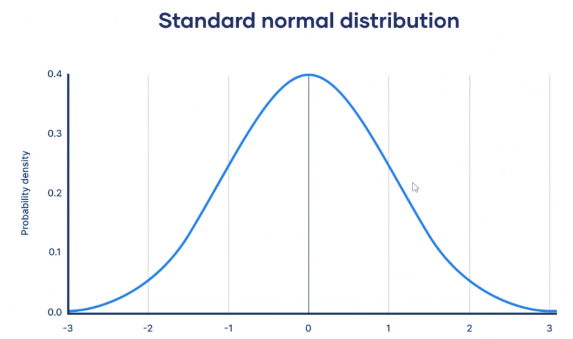

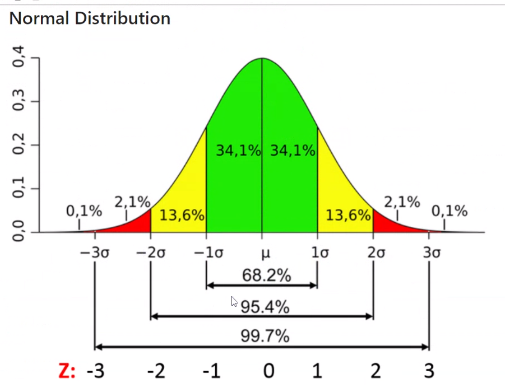

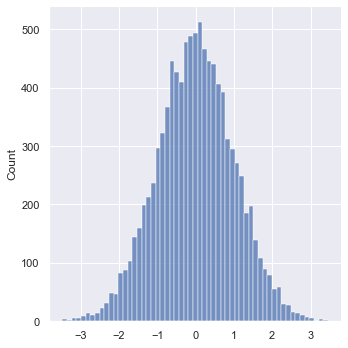

In [6]:
from scipy.stats import norm
data_normal = norm.rvs(size=10000, loc=0, scale=1)

sns.displot(data_normal)

## Gamma Distribution

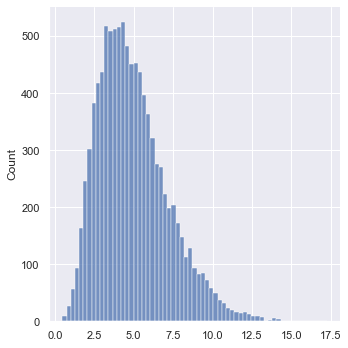

In [7]:
from scipy.stats import gamma
data_gamma = gamma.rvs(size=10000, a=5)
sns.displot(data_gamma)

## Exponential Distribution

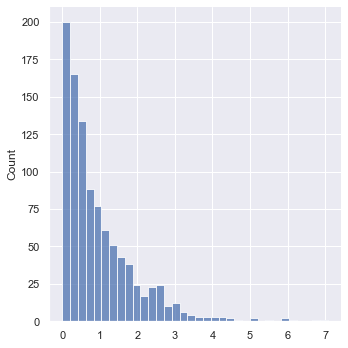

In [8]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1, loc=0, size=1000)

sns.displot(data_expon)

## Poisson Distribution (Discrete/ Count Data)

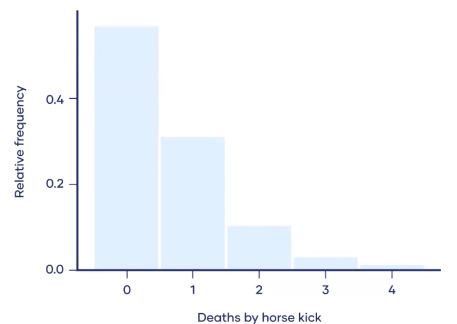

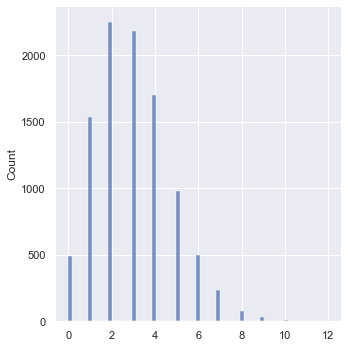

In [9]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)
sns.displot(data_poisson)

## Binomial Distribution (Discrete)

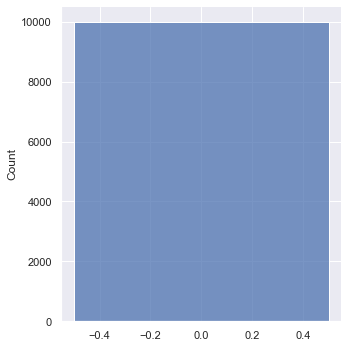

In [10]:
from scipy.stats import binom
data_binom= binom.rvs(n=10, p=0, size=10000)
sns.displot(data_binom)

## Bernoulli Distribution

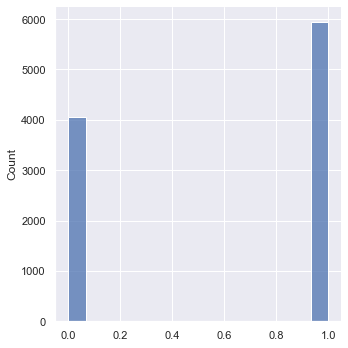

In [11]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000, p=0.6)
sns.displot(data_bern)

## Confidence Interval
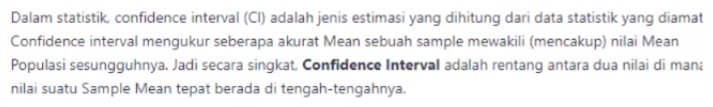

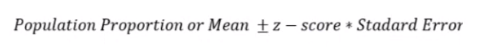

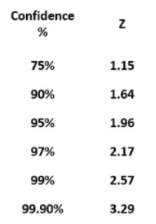

Confidence Interval 95% maka Z-Score 1.96

cth 160 +- 5
maka batas bawah 155
batas atas nya 165

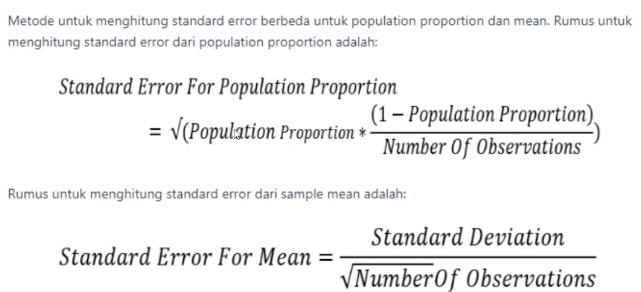

## Confidence Interval for The Population Proportion

In [12]:
import pandas as pd
import numpy as np

df= pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


1 Pria 0 wanita
1 sakit jantung

In [13]:
def sex_label(x):
    if x==1:
        return 'Male'
    else:
        return 'Female'

In [14]:
df['sex_label']

KeyError: 'sex_label'

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [16]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

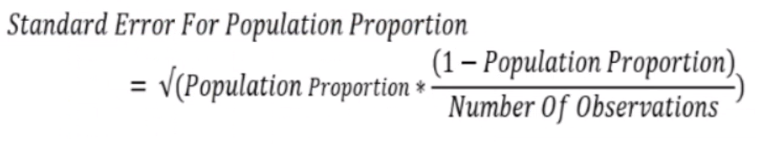

In [17]:
df.groupby(['sex_label','target'])[['target']].count()

KeyError: 'sex_label'

In [ ]:
n = 86+226
pro_fm = 86/n
print(n, pro_fm)

In [ ]:
stderror_fm = (pro_fm*(1-pro_fm)/n)**(1/2)
stderror_fm

Ambil Conffidence Interval 95% (Z-Score = 1.96)

In [ ]:
z_score = 1.96
low_ci_fm = pro_fm - (z_score*stderror_fm)
up_ci_fm = pro_fm + (z_score*stderror_fm)
print(low_ci_fm, up_ci_fm)

In [ ]:
print('Margin Error=', (z_score*stderror_fm))

#### Contoh lain

In [18]:
import scipy.stats as stats
import random
import warnings

## Generate Massa Populasi dalam Pounds dibagi menjadi wanita dna pria

In [19]:
normal_distribution_male =  norm.rvs(loc=181, scale=24, size=6000)
normal_distribution_fem = norm.rvs(loc=132, scale=22, size=6500)
all_mass = np.concatenate([normal_distribution_male, normal_distribution_fem], axis=0)

df_mass = pd.DataFrame(all_mass, columns=['people_mass'])
df_mass

,people_mass
0,185.149262
1,132.527293
2,198.110061
3,221.893763
4,174.144052
...,...
12495,110.868451
12496,146.799200
12497,141.557288
12498,113.687903


In [20]:
len(normal_distribution_fem)

6500

In [21]:
len(all_mass)

12500

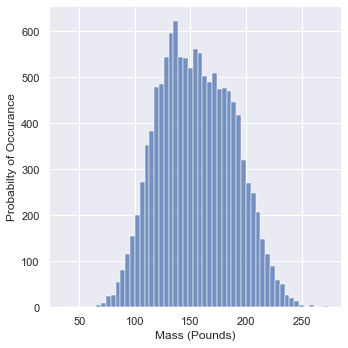

In [22]:
sns.displot(df_mass['people_mass'])
plt.ylabel('Probabilty of Occurance')
plt.xlabel('Mass (Pounds)')
plt.show()

In [23]:
population_mean = df_mass['people_mass'].mean()
population_mean 

155.28438627295176

In [24]:
#std
population_std = df_mass['people_mass'].std(ddof=1)
population_std

33.587434915152215

Kita mengambil 250 sampel masing-masing sebanyak 30 data(orang) per sampel

untuk menguji metodelogi

In [25]:
n = 30
sample_means=[]
for sample in range(0,250):
    sample_values=np.random.choice(df_mass['people_mass'].sample(n))
    sample_mean = sample_values.mean()
    sample_means.append(sample_mean)    

In [26]:
sample_means

[195.22706825312227,
 197.75526326665894,
 141.49420932147834,
 214.5649301191891,
 160.4687476623693,
 136.61065754029616,
 177.23276801028464,
 146.48473361767338,
 135.7439839940622,
 226.38744891811376,
 153.42238307707018,
 194.43932890122937,
 138.46680103646574,
 147.79542920895162,
 141.2889966448949,
 128.20565238815283,
 148.78466245657916,
 161.1852227799748,
 137.1814334245274,
 100.81783261082288,
 201.97831700994217,
 83.1084386084951,
 148.66698581578282,
 107.8293035468024,
 188.6608044556369,
 160.83789795850078,
 105.74457086873647,
 220.64999931859467,
 150.47373629944312,
 159.23581345686276,
 139.5574159153073,
 146.21388540866656,
 207.4815727050895,
 117.60325093464768,
 140.51994119200748,
 152.2421395035737,
 159.87540657176746,
 189.57013379023735,
 102.76838985412641,
 80.56719445264059,
 167.0575426958496,
 152.80473968879258,
 118.58880064410052,
 155.86066373143694,
 196.9796841563396,
 201.95322401355617,
 177.62761512616535,
 168.70808315581442,
 174.114

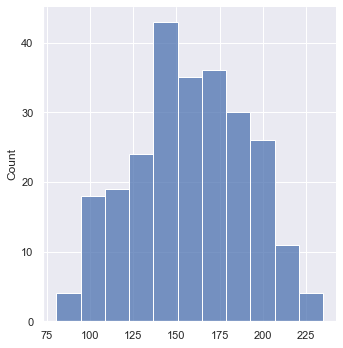

In [27]:
sns.displot(sample_means)

In [28]:
df_mass['people_mass'].sample(10)

2379     174.544115
4765     180.881720
8696     131.294309
3418     135.925004
1635     175.664760
383      178.899939
2329     158.725656
7737     128.392647
5070     153.046956
10720    136.140212
Name: people_mass, dtype: float64

In [29]:
mean_of_sample_means = np.mean(sample_means)
median_of_sample_means = np.median(sample_means)
mean_of_sample_means, median_of_sample_means

(157.9400996394671, 158.90442737236998)

In [30]:
population_mean

155.28438627295176

In [31]:
std_of_sample_means = np.std(sample_means)
std_of_sample_means

32.41479703400932

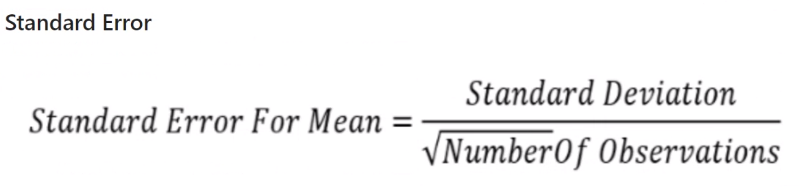

In [32]:
standard_error = population_std/np.sqrt(n)
standard_error

6.132198583921828

In [33]:
std_of_sample_means

32.41479703400932

Kesimpulan

Sample memiliki karakteristik yang serupa dengan populasi

## Visualisasikan Area dari Confidence Interval

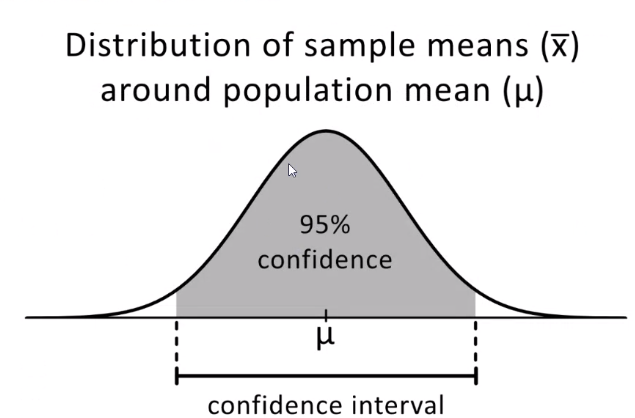

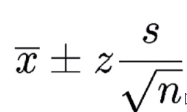

In [34]:
stats.norm.cdf(2.17)

0.9849965770262678

In [35]:
z = 1.96

In [36]:
lower_bound = mean_of_sample_means - z * standard_error
lower_bound

145.9209904149803

In [37]:
upper_bound = mean_of_sample_means + z * standard_error
upper_bound

169.95920886395388

Text(120, 0.01, 'Shaded Area are part of The Confidence Interval 95%')

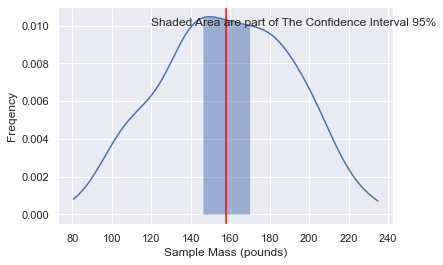

In [44]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means),np.max(sample_means),10000)
plt.plot(pos, kde(pos))
shade = np.linspace(lower_bound, upper_bound,300)
plt.fill_between(shade,kde(shade), alpha=0.5)
plt.xlabel('Sample Mass (pounds)')
plt.ylabel('Freqency')
plt.axvline(x=mean_of_sample_means,color='red')
plt.text(x=120, y=.01, s='Shaded Area are part of The Confidence Interval 95%')

In [46]:
pos

array([ 80.56719445,  80.58261395,  80.59803345, ..., 234.71591671,
       234.73133621, 234.74675571])

## Hypothesis Testing

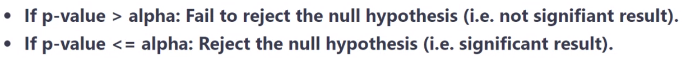

In [47]:
pd.read_csv('heart.csv')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


nhanes_2015_2016.csv

In [48]:
df = pd.read_csv('nhanes_2015_2016.csv')
df

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


Uji Apakah rata-rata BMI dari laki-laki lebih tinggi daripada BMI perempuan

h0 = rata-rata BMI laki-laki lebih tinggi signifikan dari perempuan

h1 = rata2 BMI laki2 lebih tinggi signifikan dari perempuan

In [49]:
females = df[df.RIAGENDR==2]
males = df[df.RIAGENDR==1]

In [52]:
n_females = len(females)
mean_females = females['BMXBMI'].mean()
std_females = females['BMXBMI'].std()
print(n_females,mean_females,std_females)

2976 29.93994565217392 7.75331880954568


In [53]:
n_males = len(males)
mean_males = males['BMXBMI'].mean()
std_males = males['BMXBMI'].std()
print(n_males,mean_males,std_males)

2759 28.778072111846942 6.252567616801485


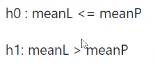

In [54]:
import statsmodels.api as sm

In [57]:
#karna confidence level 95%
alpha=0.05

In [56]:
bmi_hypo = sm.stats.ztest(males['BMXBMI'].dropna(),females['BMXBMI'].dropna(),alternative='larger')
bmi_hypo

(-6.1755933531383205, 0.9999999996704227)

In [58]:
if bmi_hypo[1]>alpha:
    print('Accept Null Hypotesis (h0)')
else:
    print('Reject Null Hypotesis (h0)')

Accept Null Hypotesis (h0)


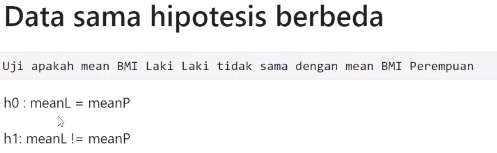

In [59]:
bmi_hypo_2s = sm.stats.ztest(males['BMXBMI'].dropna(),females['BMXBMI'].dropna(),alternative='two-sided')
bmi_hypo_2s

(-6.1755933531383205, 6.591544431126401e-10)

In [60]:
if bmi_hypo_2s[1]>alpha:
    print('Accept Null Hypotesis (h0)')
else:
    print('Reject Null Hypotesis (h0)')

Reject Null Hypotesis (h0)


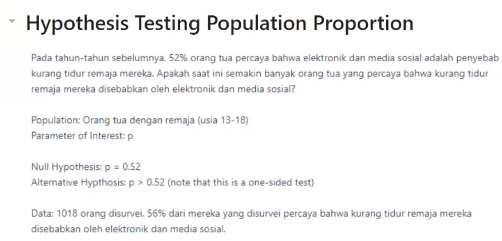

In [61]:
n = 1018
pro_null = 0.52
pro_alt = 0.56

In [64]:
pro_hypo = sm.stats.proportions_ztest(n*pro_alt, n, pro_null, alternative='larger')

In [65]:
if pro_hypo[1]>alpha:
    print('Accept Null Hypotesis (h0)')
else:
    print('Reject Null Hypotesis (h0)')

Reject Null Hypotesis (h0)
